In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import LineModelND, ransac

In [2]:
img = cv2.imread('eye.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)

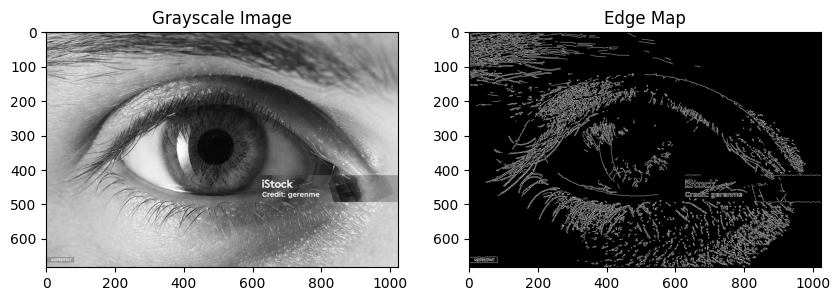

In [3]:
# 2. Line detection using Hough Transform
plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(gray, cmap='gray'); plt.title("Grayscale Image")
plt.subplot(122); plt.imshow(edges, cmap='gray'); plt.title("Edge Map")
plt.show()

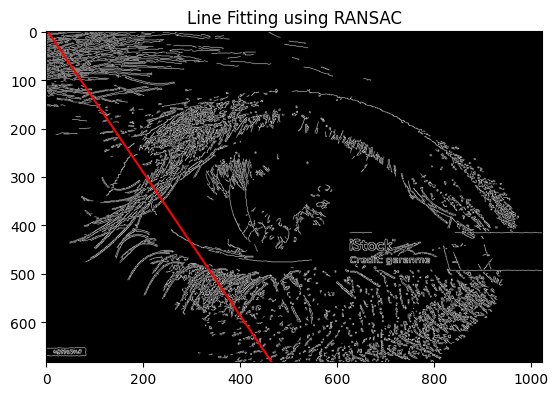

In [5]:
y, x = np.nonzero(edges)
data = np.column_stack([x, y])
model_robust, inliers = ransac(data, LineModelND, min_samples=2, residual_threshold=2, max_trials=1000)
outliers = inliers == False
line_y = np.arange(gray.shape[0])
line_x = model_robust.predict_y(line_y)

plt.imshow(edges, cmap='gray')
plt.plot(line_x, line_y, color='red')
plt.title("Line Fitting using RANSAC")
plt.show()

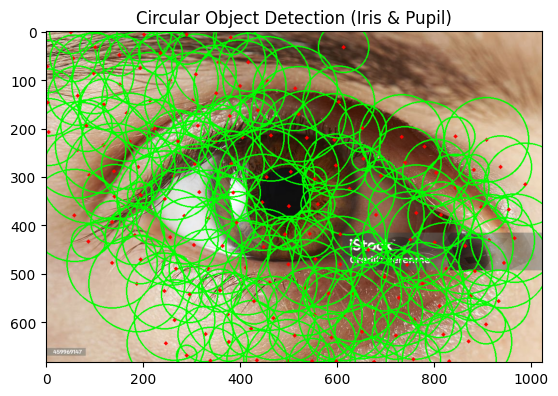

In [6]:
# ---------- 4. Circle Detection (for iris/pupil)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                            param1=100, param2=30, minRadius=20, maxRadius=100)
circ_output = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(circ_output, (x, y), r, (0, 255, 0), 2)
        cv2.circle(circ_output, (x, y), 2, (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(circ_output, cv2.COLOR_BGR2RGB))
plt.title("Circular Object Detection (Iris & Pupil)")
plt.show()

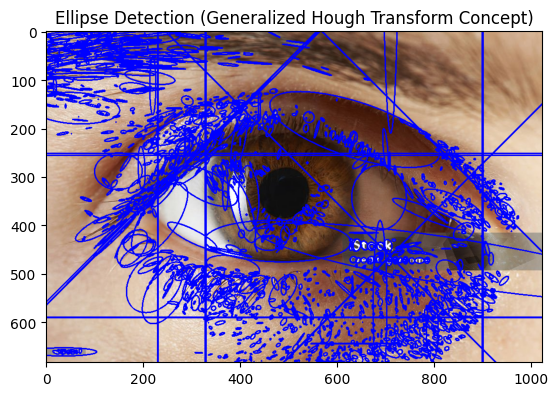

In [7]:
#  5. Ellipse fitting (using contour and least squares)
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
ellipse_output = img.copy()
for cnt in contours:
    if len(cnt) >= 5:
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(ellipse_output, ellipse, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(ellipse_output, cv2.COLOR_BGR2RGB))
plt.title("Ellipse Detection (Generalized Hough Transform Concept)")
plt.show()